# Interpolação de Bézier

## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Funções

### Coeficientes de Bézier

In [2]:
def get_bezier_coef(points):
    '''
    Encontra os pontos A e B
    '''
    
    # As fórmulas funcionam dado que temos n + 1 pontos
    n = len(points) - 1

    # Constrói matriz de coeficientes
    C = 4 * np.identity(n)
    C[0, 0] = 2
    C[n - 1, n - 1] = 7
    C[n - 1, n - 2] = 2
    np.fill_diagonal(C[1:], 1)
    np.fill_diagonal(C[:, 1:], 1)

    # Constrói pontos do vetor
    P = [2 * (2 * points[i] + points[i + 1]) for i in range(n)]
    P[0] = points[0] + 2 * points[1]
    P[n - 1] = 8 * points[n - 1] + points[n]

    # Resolve sistema linear, encontrando pontos A e B
    A = np.linalg.solve(C, P)
    B = [0] * n

    for i in range(n - 1):
        B[i] = 2 * points[i + 1] - A[i + 1]

    B[n - 1] = (A[n - 1] + points[n]) / 2

    return A, B

### Fórmula geral para as curvas cúbicas de Bézier

In [3]:
def get_cubic(p0, p1, p2, p3):
    '''
    Retorna a fórmula geral para as curvas cúbicas de Bézier, dado 4 pontos de controle
    '''

    return lambda t: (
        p0 * np.power(1 - t, 3))\
        + (3 * p1 * t * np.power(1 - t, 2))\
        + (3 * p2 * np.power(t, 2) * (1 - t) )\
        + (p3 * np.power(t, 3)
    )

### Curvas cúbicas de Bézier aplicadas nos pontos dados

In [4]:
def get_bezier_cubic(points):
    '''
    Retorna uma curva cúbica para cada ponto consecutivo
    '''
    A, B = get_bezier_coef(points)
    
    return [
        get_cubic(points[i], A[i], B[i], points[i + 1])
        for i in range(len(points) - 1)
    ]

### Avaliação das curvas cúbicas de Bézier

In [5]:
def evaluate_bezier(points, n):
    '''
    Avalia cada curva cúbica no intervalo [0, 1] dividida em n pontos
    '''
    curves = get_bezier_cubic(points)
    return np.array([curve(t) for curve in curves for t in np.linspace(0, 1, n)])

### Visualização

In [6]:
def visualize_bezier(points):
    '''
    Retorna gráfico com a visualização das curvas cúbicas de Bézier para os pontos dados
    '''    
    # Ajusta os pontos com a interpolação de Bezier
    # Use 50 pontos entre cada ponto consecutivo para desenhar a curva
    path = evaluate_bezier(points, 50)

    # Extrair coordenadas x & y dos pontos
    px, py = path[:,0], path[:,1]
    x, y = points[:,0], points[:,1]

    # Plot
    plt.figure(figsize = (11, 8))
    plt.plot(px, py, 'b-')
    plt.plot(x, y, 'ro')
    plt.title(str(len(points)) + ' pontos')
    plt.show()

## Resultados

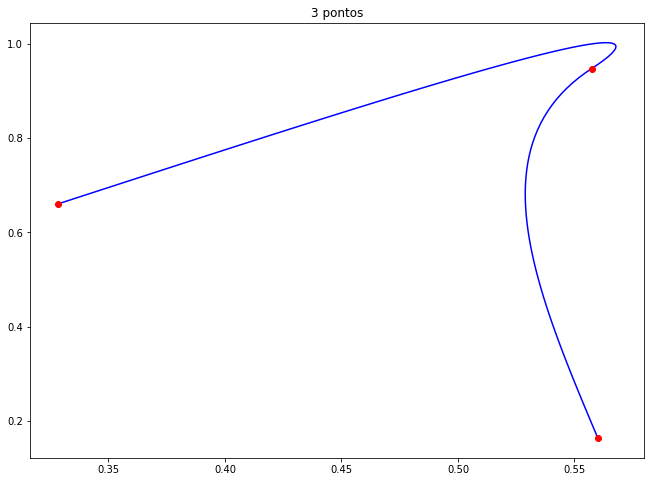

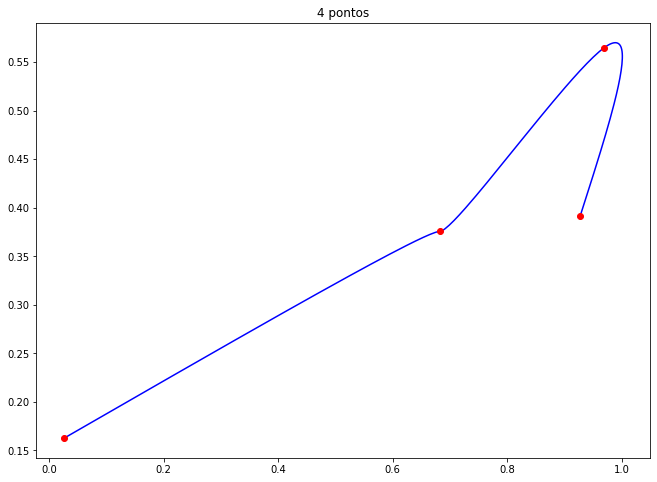

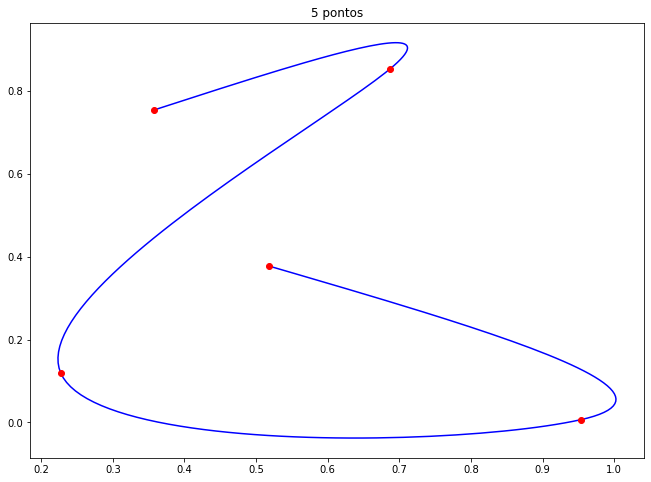

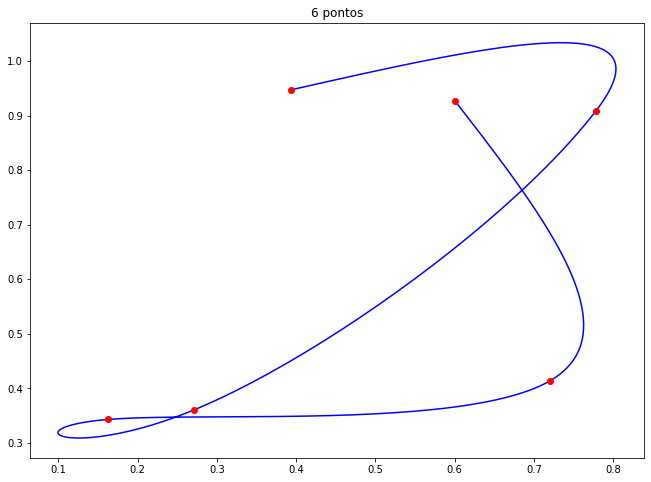

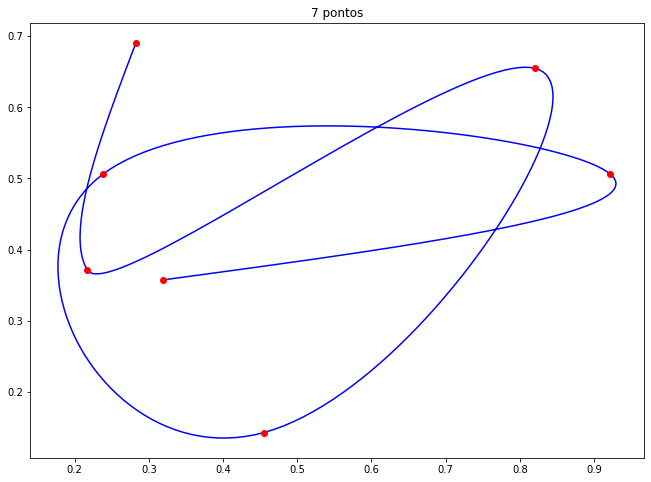

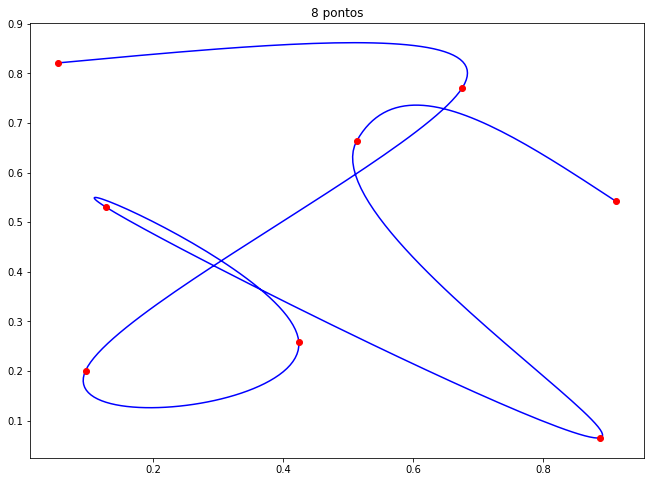

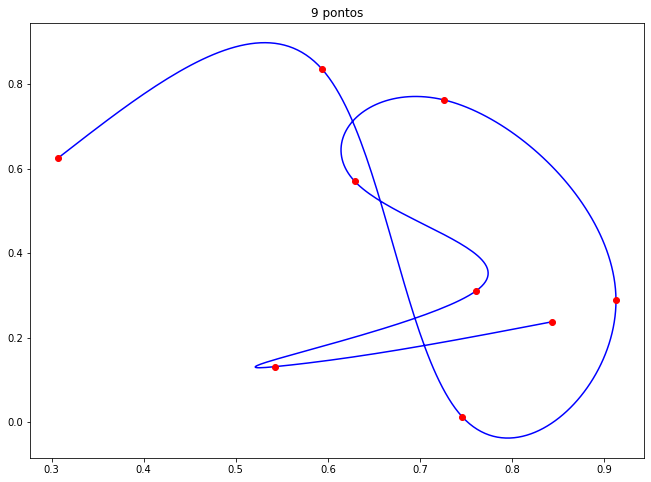

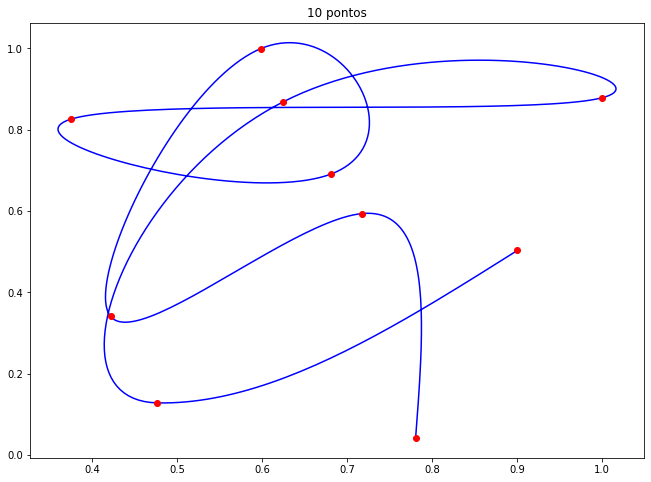

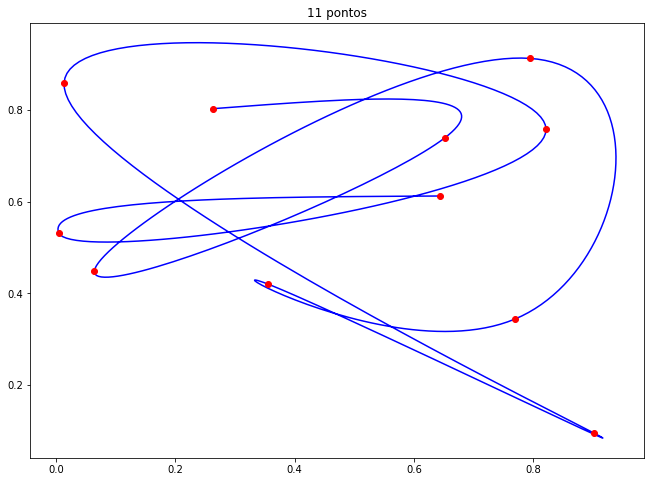

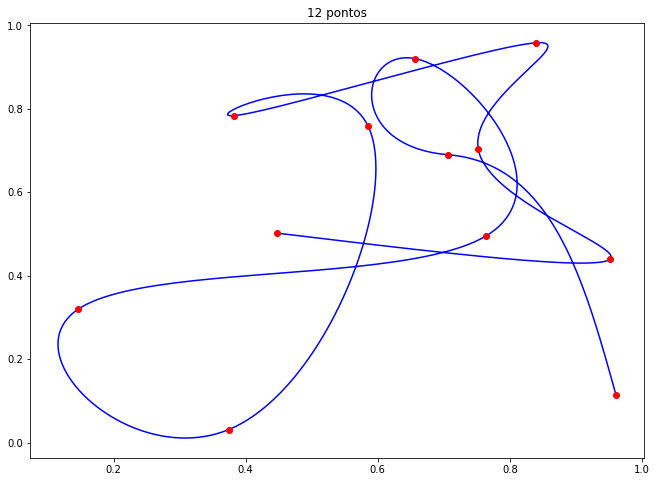

In [7]:
for i in range(10):
    points = np.random.rand(i + 3, 2)
    visualize_bezier(points)